In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
import numpy as np
import calendar
import pyspark

In [5]:
visitas = pd.read_csv('Sources/fiuba_3_vistas.csv')
avisos = pd.read_csv('Sources/fiuba_6_avisos_detalle.csv')

In [20]:
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


In [8]:
visitas["timestamp"] = visitas["timestamp"].astype("datetime64")
fechas = visitas['timestamp']
df_fechas = pd.DataFrame({'dia':fechas.dt.day,'mes':fechas.dt.month})

/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


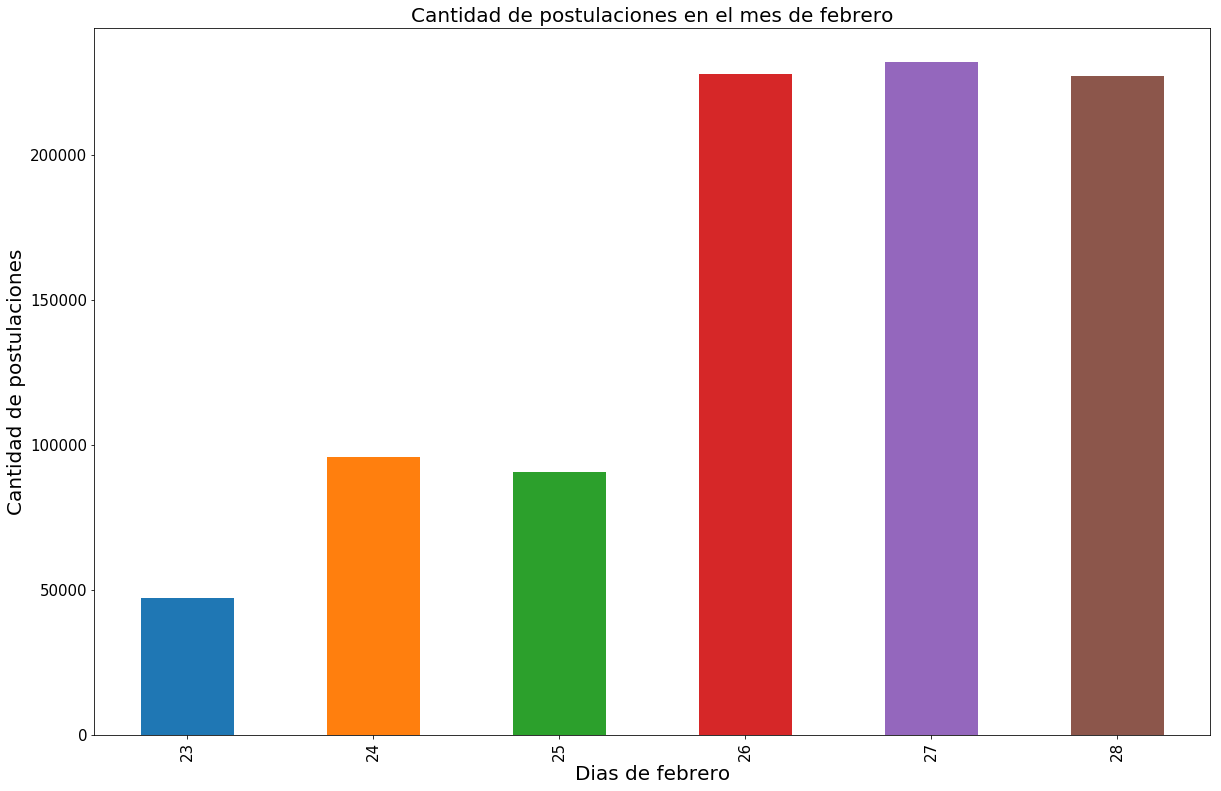

In [13]:
plt = df_fechas.groupby('mes').get_group(2)['dia'].value_counts().sort_index().plot.bar(figsize=(20,13))
plt.set_title('Cantidad de postulaciones en el mes de febrero', size=20)
plt.set_xlabel('Dias de febrero', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('both',labelsize=15)

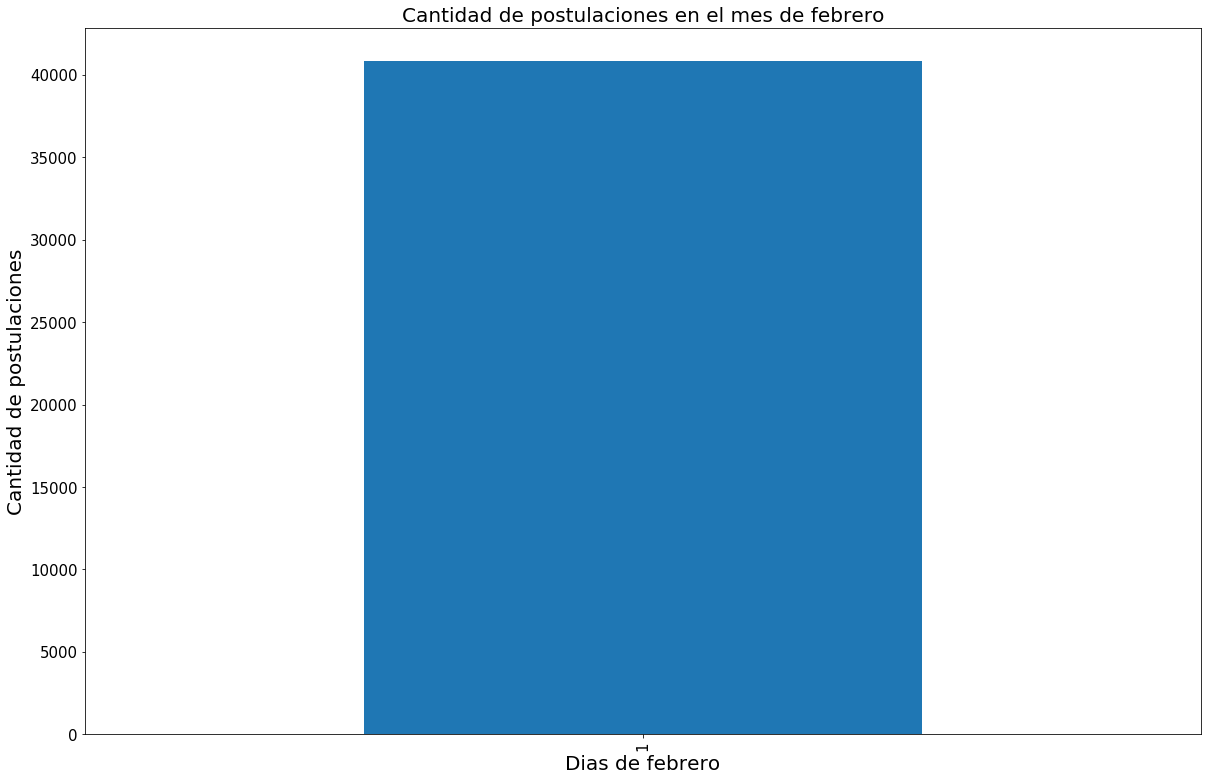

In [14]:
plt = df_fechas.groupby('mes').get_group(3)['dia'].value_counts().sort_index().plot.bar(figsize=(20,13))
plt.set_title('Cantidad de postulaciones en el mes de febrero', size=20)
plt.set_xlabel('Dias de febrero', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('both',labelsize=15)

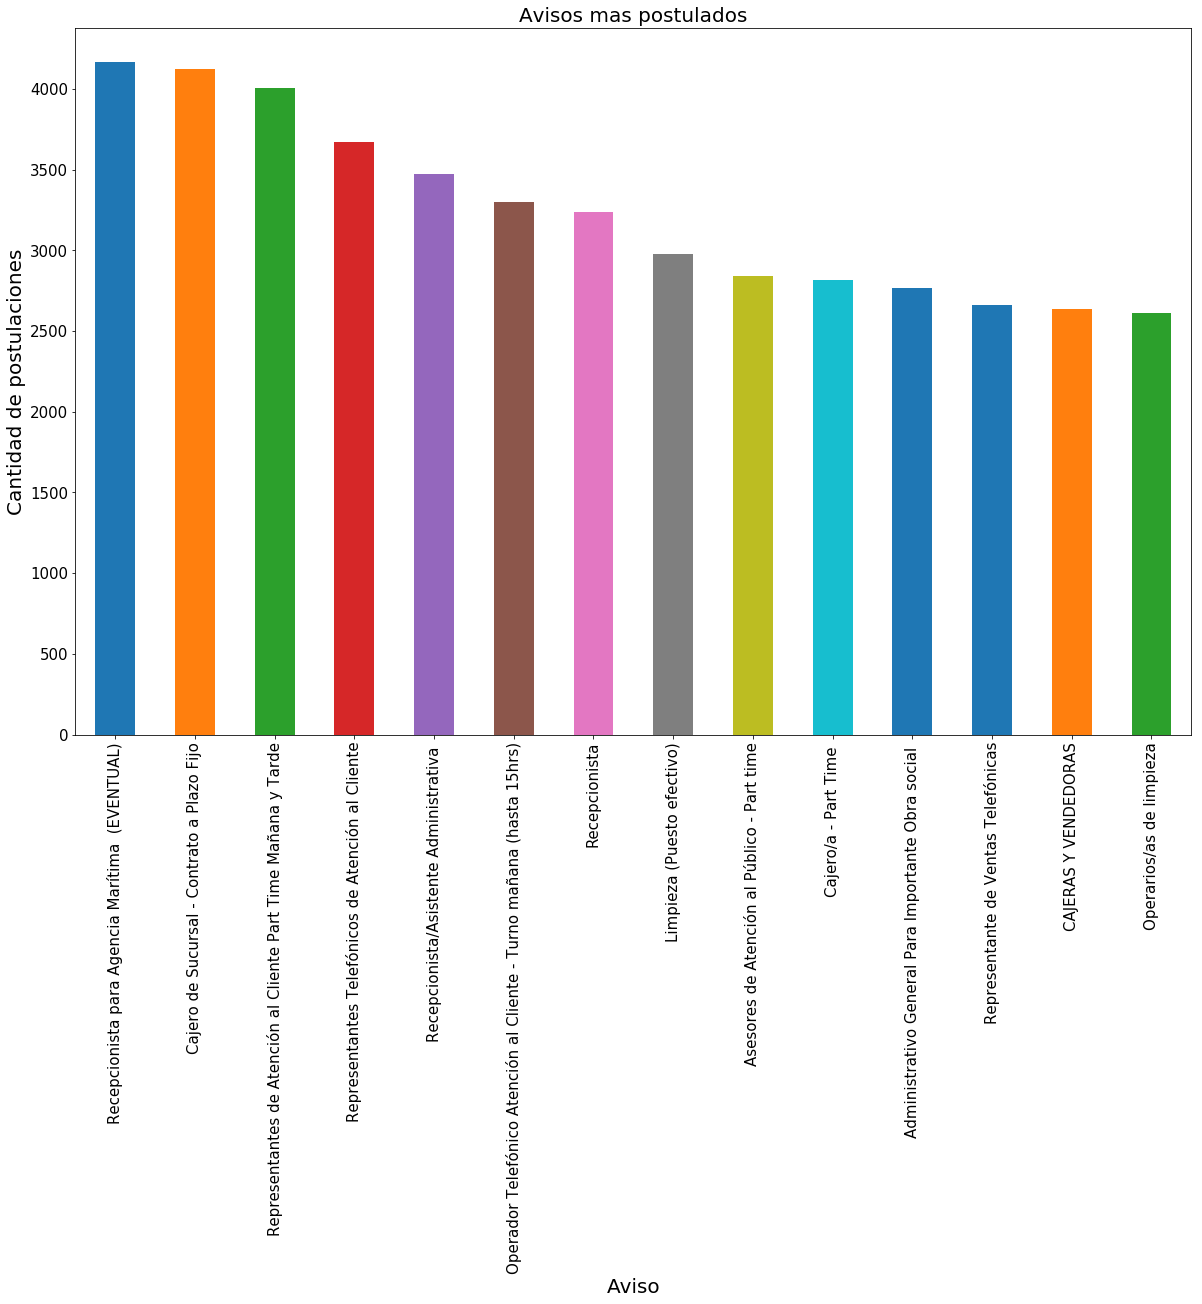

In [22]:
aux = visitas['idAviso'].value_counts()[:14]
aux = aux.rename(lambda x: avisos.set_index('idaviso').loc[x,'titulo'])
plt = aux.plot.bar(figsize=(20,13))
plt.set_title('Avisos mas postulados', size=20)
plt.set_xlabel('Aviso', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('y', labelsize=15)
plt.tick_params('x', labelsize=15)